In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

from studytimeboard.utils.gsheet import GoogleSheet
from studytimeboard.data_analysis import *
from studytimeboard.constant import *

/home/congyu/congyu_program/pythons/inits/p_study_time_board


/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/flask_sqlalchemy/__init__.py:834: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


In [18]:
gs = GoogleSheet.read_from(STUDY_TIME_TABLE_NAME)

In [19]:
sheet = gs.table.worksheet(SHEET1)
print(dir(sheet))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'insert_rows', 'merge_cells', 'range', 'resize', 'row_count', 'row_values', 'set_basic_filter', 'sort', 'spreadsheet', 'title', 'update', 'update_acell', 'update_cell', 'update_cel

In [20]:
# sheet.append_row(["test" for _ in range(4)])

In [21]:
df_dur = gs.sheet(sheet_name=SHEET1, least_col_name=START_TIME)
df_dur

,name,date,start_time,end_time
0,Alpha,2020.11.09,11:00,12:00
1,Delta,2020.11.09,11:00,12:00
2,Delta,2020.11.09,08:00,15:00
3,Beta,2020.11.09,08:00,15:00
4,Diqing,2020.11.09,19:00,23:00
...,...,...,...,...
136,Congyu,2021.01.09,21:10,21:26
137,Congyu,2021.01.09,22:30,22:35
138,Congyu,2021.01.10,10:45,10:50
139,Congyu,2021.01.11,00:01,01:00


In [22]:
df_eve = gs.sheet(sheet_name=SHEET2, least_col_name=NAME)
df_eve

,name,act,date,time
0,LiuYang,go,2020.11.30,10:00
1,Congyu,go,2020.11.30,10:00
2,Nia.Dai,hold,2020.11.30,10:50
3,LiuYang,hold,2020.11.30,10:50
4,Congyu,go,2020.11.30,11:00
...,...,...,...,...
259,Shangsu,go,2021.01.11,10:07
260,Congyu,go,2021.01.11,09:15
261,Shangsu,hold,2021.01.11,23:59
262,Shangsu,go,2021.01.12,09:15


In [23]:
df = merge_dur_eve(df_dur, df_eve)
     
df.head()

,name,date,start_time,end_time
0,Alpha,2020.11.09,11:00,12:00
1,Delta,2020.11.09,11:00,12:00
2,Delta,2020.11.09,08:00,15:00
3,Beta,2020.11.09,08:00,15:00
4,Diqing,2020.11.09,19:00,23:00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 144
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        286 non-null    object
 1   date        286 non-null    object
 2   start_time  286 non-null    object
 3   end_time    286 non-null    object
dtypes: object(4)
memory usage: 11.2+ KB


In [25]:
df_r = add_analysis_columns(df)
df_r.head()

,name,date,start_time,end_time,start_time_datetime,end_time_datetime,minutes,date_datetime,weekday
0,Alpha,2020.11.09,11:00,12:00,1900-01-01 11:00:00,1900-01-01 12:00:00,60.0,2020-11-09,Monday
1,Delta,2020.11.09,11:00,12:00,1900-01-01 11:00:00,1900-01-01 12:00:00,60.0,2020-11-09,Monday
2,Delta,2020.11.09,08:00,15:00,1900-01-01 08:00:00,1900-01-01 15:00:00,420.0,2020-11-09,Monday
3,Beta,2020.11.09,08:00,15:00,1900-01-01 08:00:00,1900-01-01 15:00:00,420.0,2020-11-09,Monday
4,Diqing,2020.11.09,19:00,23:00,1900-01-01 19:00:00,1900-01-01 23:00:00,240.0,2020-11-09,Monday


In [26]:
df_r = to_this_week_table(df_r)
df_r.head()

,name,date,start_time,end_time,start_time_datetime,end_time_datetime,minutes,date_datetime,weekday
139,Congyu,2021.01.11,00:01,01:00,1900-01-01 00:01:00,1900-01-01 01:00:00,59.0,2021-01-11,Monday
140,Shangsu,2021.01.11,00:01,01:14,1900-01-01 00:01:00,1900-01-01 01:14:00,73.0,2021-01-11,Monday
138,Shangsu,2021.01.11,10:07,23:59,1900-01-01 10:07:00,1900-01-01 23:59:00,832.0,2021-01-11,Monday
139,Congyu,2021.01.11,09:15,09:45,1900-01-01 09:15:00,1900-01-01 09:45:00,30.0,2021-01-11,Monday
143,Congyu,2021.01.12,10:52,11:22,1900-01-01 10:52:00,1900-01-01 11:22:00,30.0,2021-01-12,Tuesday


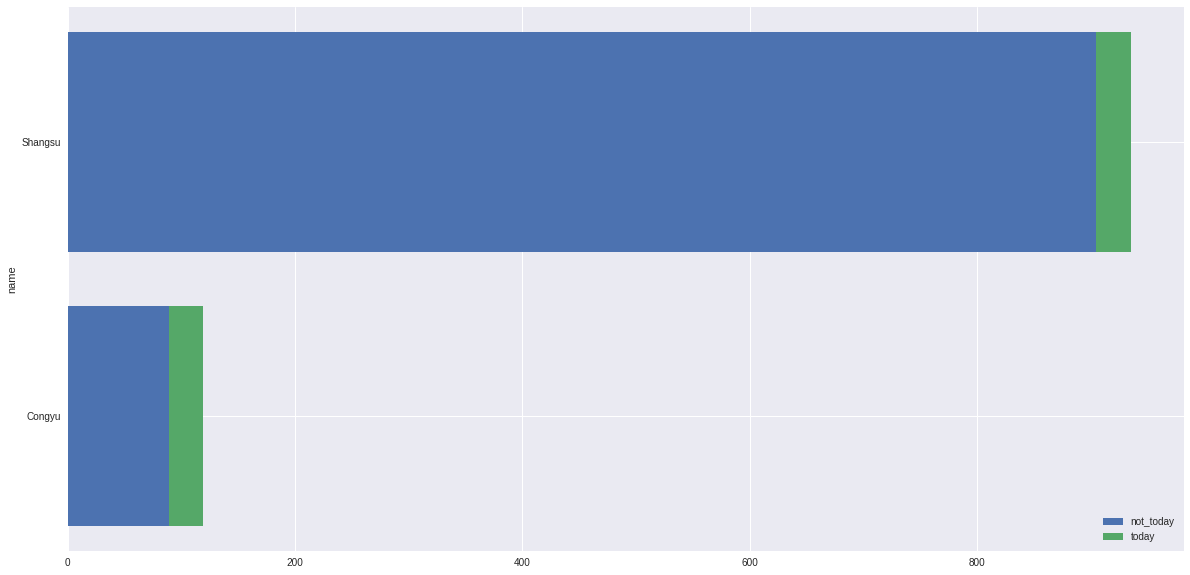

In [70]:
barhplot_stacked("minutes", "name", "weekday", df_r)